In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')


In [2]:
data = pd.read_csv("car data.csv")


In [3]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [5]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
data[data.dtypes[data.dtypes=='object'].index].describe()

,Car_Name,Fuel_Type,Seller_Type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


#### EDA


In [7]:
if len(data[data.isnull().any(axis=1)]) !=0:
    print("No. of missing values:{}").format(len(data[data.isnull().any(axis=1)]))
    msno.matrix(data)
else:
    print("No missing values")

No missing values


In [8]:
if len(data[data.duplicated()]) > 0:
    print("No. of duplicate values:{}").format(len(data[data.duplicated()]))
    print(data[data.duplicated(keep = False )].sort_values(by = list(data.columns)).head())
    
else:
    print("No duplicate values")

No. of duplicate values:2
    Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
15    ertiga  2016           7.75          10.79       43000    Diesel   
17    ertiga  2016           7.75          10.79       43000    Diesel   
51  fortuner  2015          23.00          30.61       40000    Diesel   
93  fortuner  2015          23.00          30.61       40000    Diesel   

   Seller_Type Transmission  Owner  
15      Dealer       Manual      0  
17      Dealer       Manual      0  
51      Dealer    Automatic      0  
93      Dealer    Automatic      0  


In [9]:
data.shape

(301, 9)

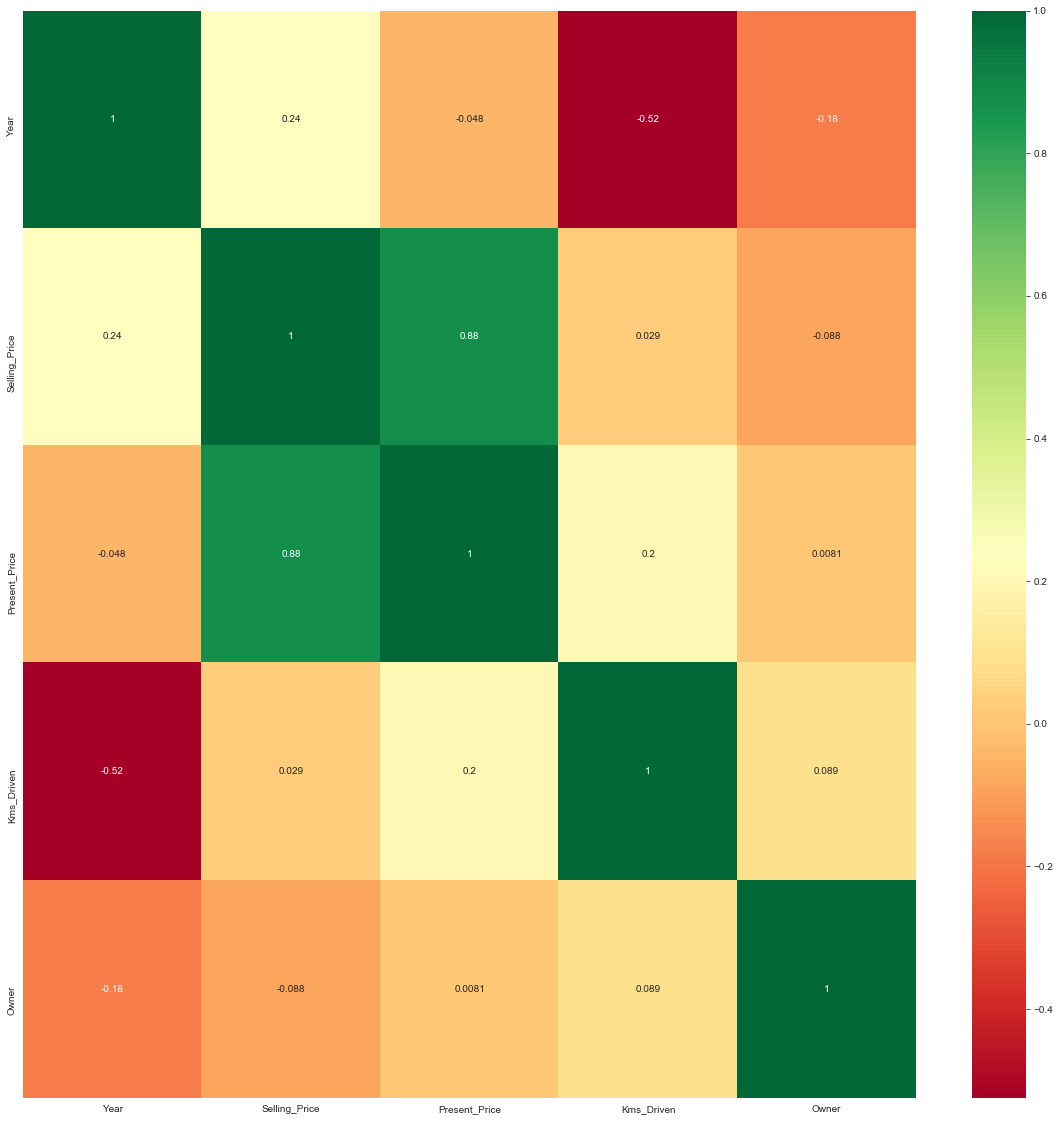

In [10]:
#correlation matrix

corr_mat = data.corr()
top_features = corr_mat.index
plt.figure(figsize=(20,20))
sns.heatmap(data[top_features].corr(), annot = True , cmap= 'RdYlGn')


In [11]:
print(pd.value_counts(data['Fuel_Type'], sort= True))

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [12]:
print(pd.value_counts(data['Seller_Type'], sort= True))

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


In [16]:
print(pd.value_counts(data['Transmission'], sort= True))

Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [15]:
print(pd.value_counts(data['Owner'], sort= True))


0    290
1     10
3      1
Name: Owner, dtype: int64


In [14]:
data.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [ ]:
#creating a new column inferring the age of car (Present year - Purchased year)

In [17]:
final_df=data[['Year','Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]

In [18]:
final_df['Current_year'] = 2020

In [19]:
final_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [20]:
final_df['no_of_years']=final_df['Current_year']- final_df['Year']

In [21]:
final_df.drop(columns=['Year','Current_year'],axis = 1,inplace=True)

In [22]:
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_of_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [23]:
final_df = pd.get_dummies(final_df,drop_first= True)

In [24]:
final_df

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1
5,9.25,9.83,2071,0,2,1,0,0,1
6,6.75,8.12,18796,0,5,0,1,0,1
7,6.50,8.61,33429,0,5,1,0,0,1
8,8.75,8.89,20273,0,4,1,0,0,1
9,7.45,8.92,42367,0,5,1,0,0,1


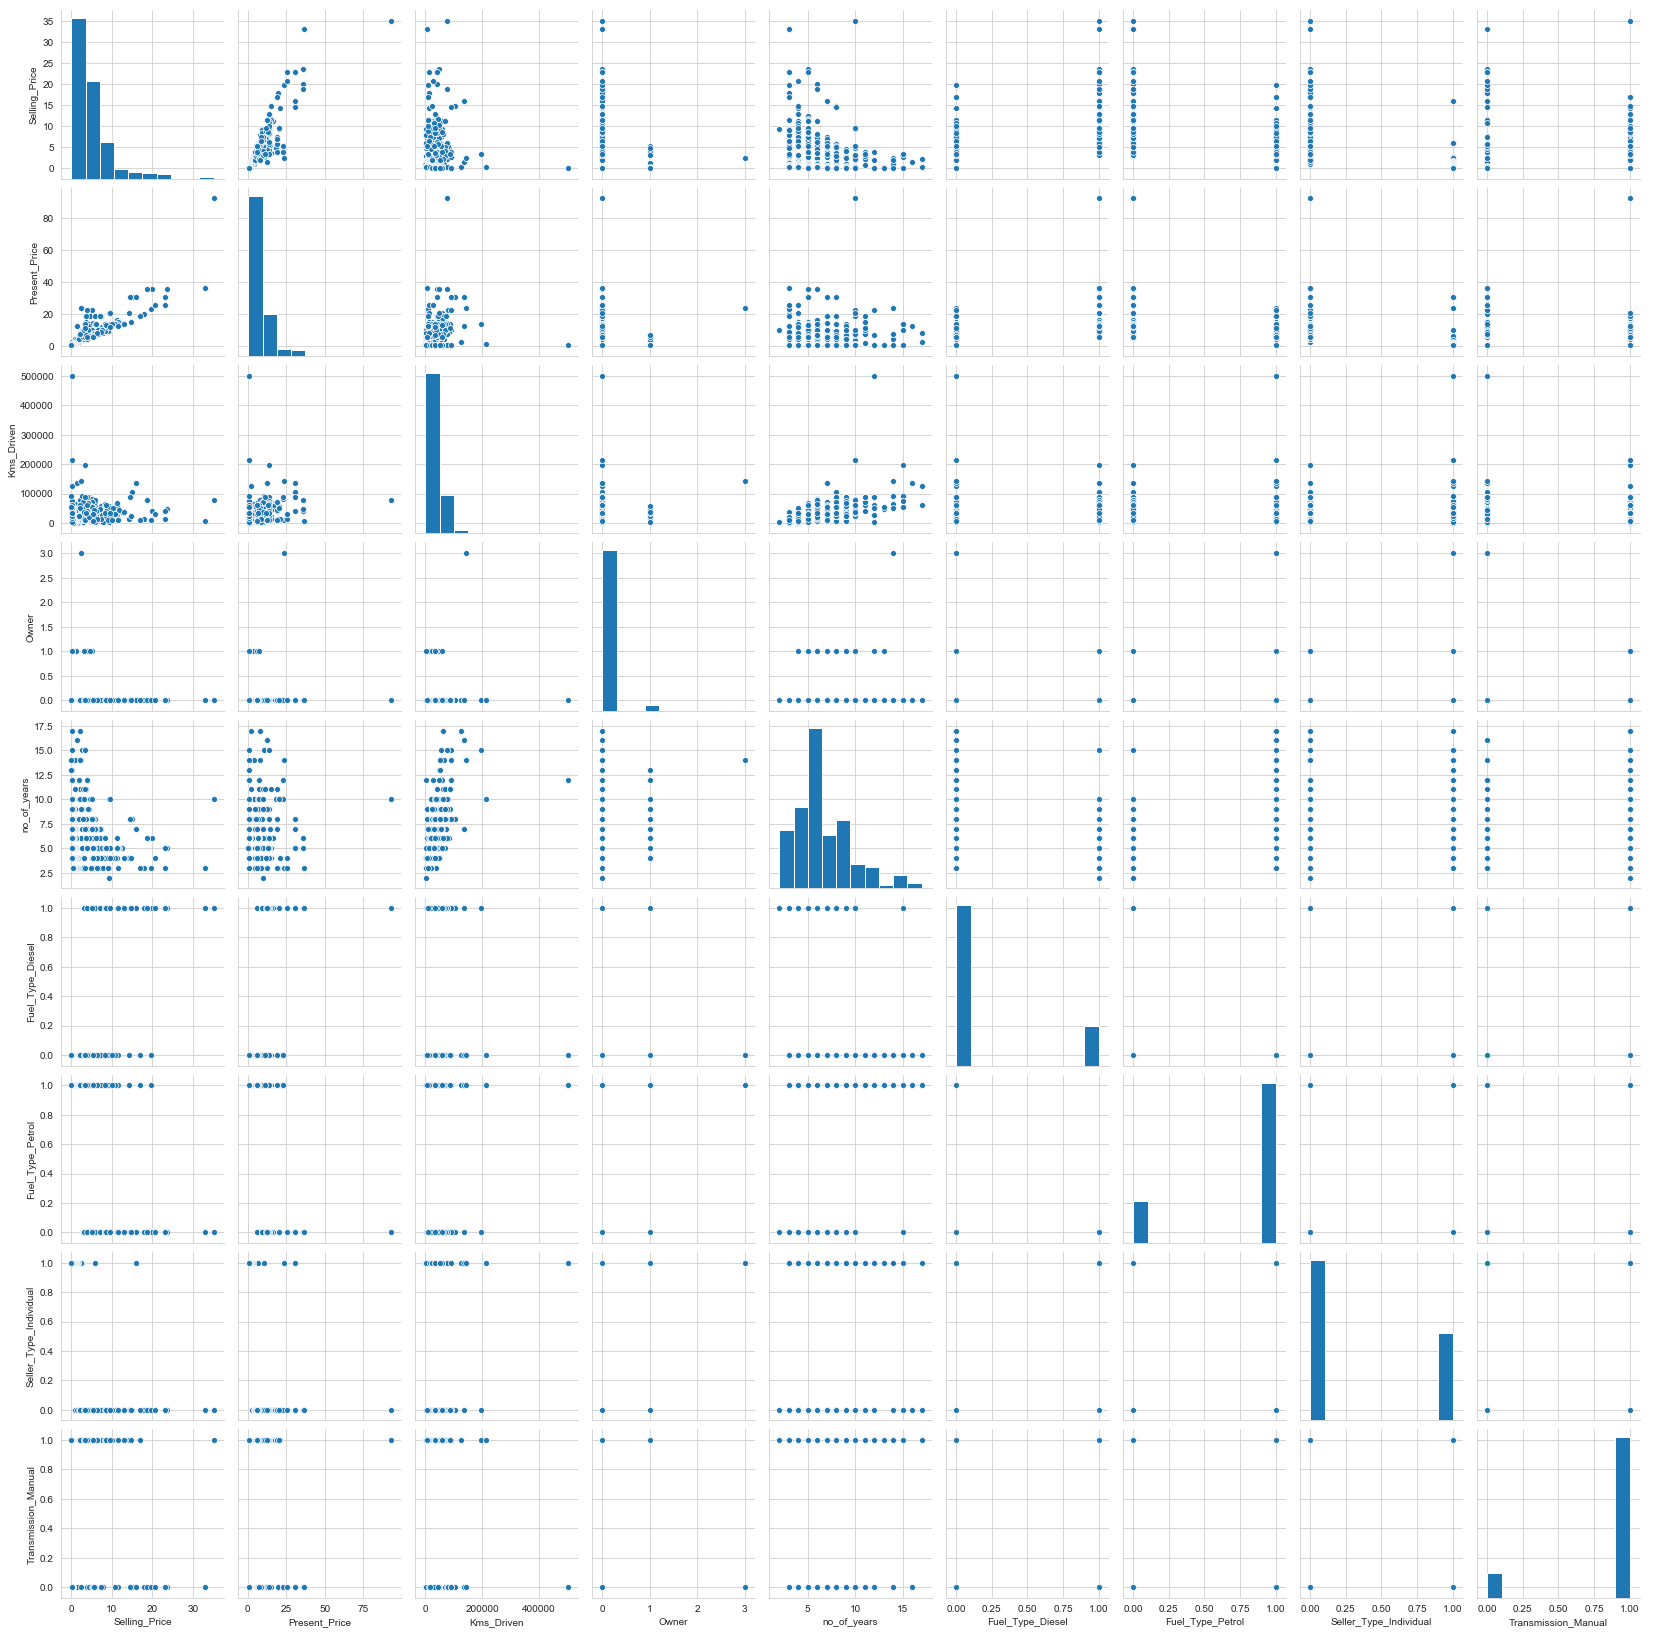

In [25]:
sns.pairplot(final_df)

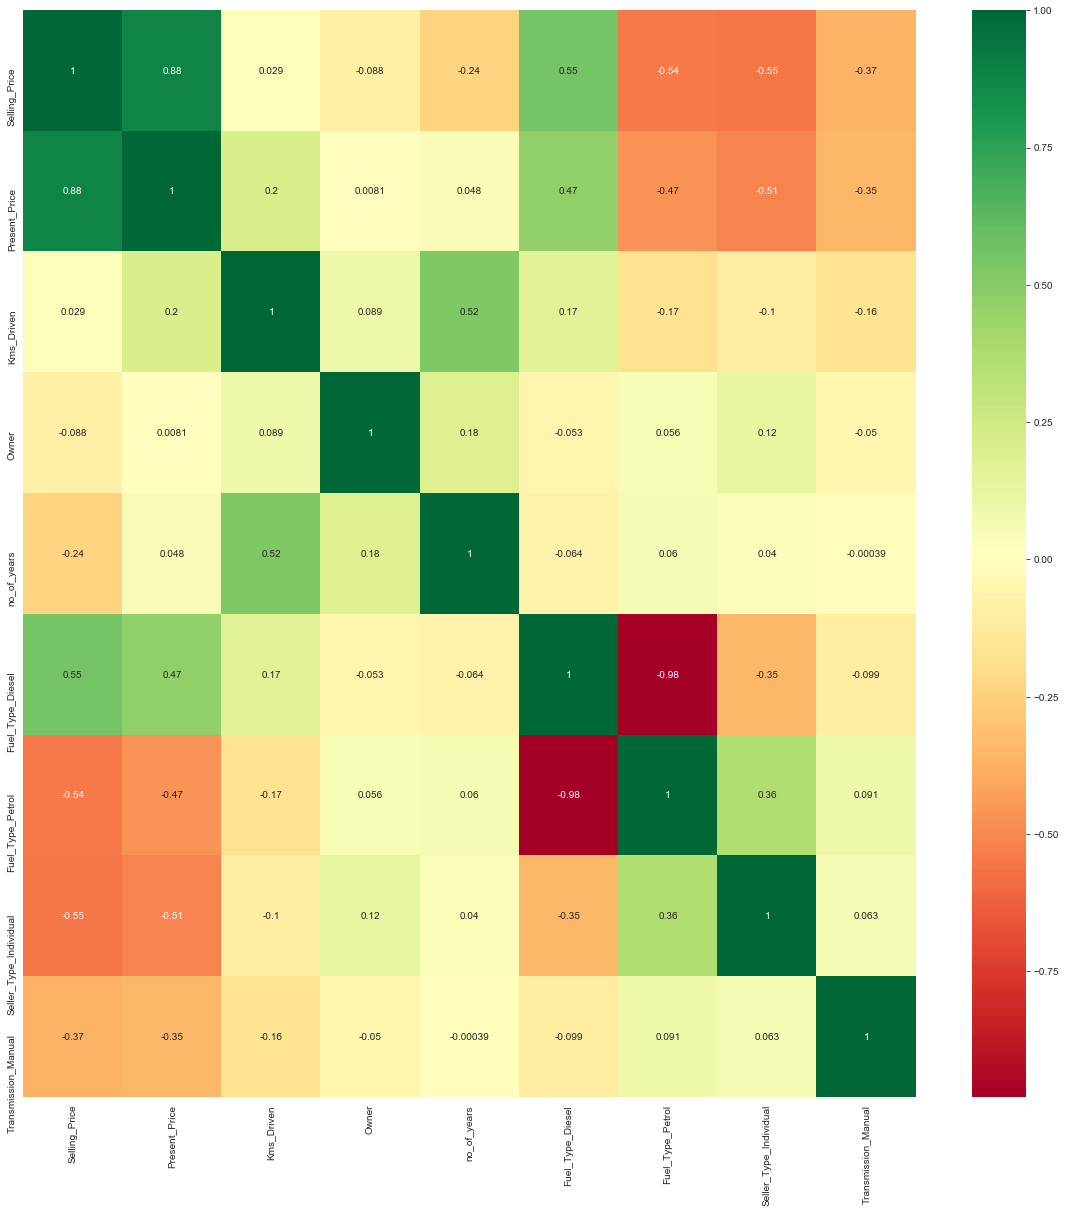

In [26]:

import seaborn as sns
#get correlations of each features in dataset
corrmat = final_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(final_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [27]:
final_df.columns

Index([u'Selling_Price', u'Present_Price', u'Kms_Driven', u'Owner',
       u'no_of_years', u'Fuel_Type_Diesel', u'Fuel_Type_Petrol',
       u'Seller_Type_Individual', u'Transmission_Manual'],
      dtype='object')

In [28]:
final_df.shape

(301, 9)

### Building of the model


In [30]:
X = final_df.iloc[:,1:]
y = final_df.iloc[:,0]

In [42]:
X.head()

,Present_Price,Kms_Driven,Owner,no_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [43]:
X.shape

(301, 8)

In [46]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [47]:
y.shape

(301L,)

In [31]:
##Checking the import features using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
et_reg = ExtraTreesRegressor()
et_reg.fit(X,y)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [32]:
et_reg.feature_importances_

array([3.19266677e-01, 4.32977657e-02, 2.68675994e-04, 7.46043667e-02,
       2.26401195e-01, 1.36811483e-02, 1.66186466e-01, 1.56293705e-01])

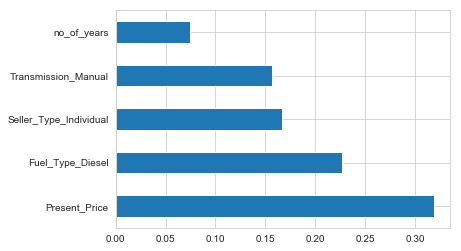

In [33]:
#plot graph of feature importances for better visualization
important_features = pd.Series(et_reg.feature_importances_, index=X.columns)
important_features.nlargest(5).plot(kind='barh')
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [35]:
X_train.shape

(210, 8)

In [56]:
X_test.shape

(91, 8)

In [36]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
#Base model for tuning

rf_regressor = RandomForestRegressor()

In [ ]:
## Hyperparameter optimization using RandomizedSearchCV

In [38]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [40]:
# Create the random grid
parameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(parameters)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'min_samples_split': [2, 5, 10, 15, 100], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_leaf': [1, 2, 5, 10]}


In [41]:
from sklearn.model_selection import RandomizedSearchCV

In [42]:

random_search = RandomizedSearchCV(estimator= rf_regressor, param_distributions = parameters,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=3, random_state=42, n_jobs = 1)

In [43]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, max_depth=10, max_features=sqrt, min_samples_leaf=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, max_depth=10, max_features=sqrt, min_samples_leaf=5, score=-2.77419341212, total=   2.0s
[CV] n_estimators=900, min_samples_split=5, max_depth=10, max_features=sqrt, min_samples_leaf=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, max_depth=10, max_features=sqrt, min_samples_leaf=5, score=-19.4796667599, total=   1.9s
[CV] n_estimators=900, min_samples_split=5, max_depth=10, max_features=sqrt, min_samples_leaf=5 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.2s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, max_depth=10, max_features=sqrt, min_samples_leaf=5, score=-4.37976715923, total=   2.1s
[CV] n_estimators=900, min_samples_split=5, max_depth=10, max_features=sqrt, min_samples_leaf=5 
[CV]  n_estimators=900, min_samples_split=5, max_depth=10, max_features=sqrt, min_samples_leaf=5, score=-4.99314087082, total=   2.0s
[CV] n_estimators=900, min_samples_split=5, max_depth=10, max_features=sqrt, min_samples_leaf=5 
[CV]  n_estimators=900, min_samples_split=5, max_depth=10, max_features=sqrt, min_samples_leaf=5, score=-1.1804696063, total=   1.9s
[CV] n_estimators=1100, min_samples_split=10, max_depth=15, max_features=sqrt, min_samples_leaf=2 
[CV]  n_estimators=1100, min_samples_split=10, max_depth=15, max_features=sqrt, min_samples_leaf=2, score=-1.86247199981, total=   2.4s
[CV] n_estimators=1100, min_samples_split=10, max_depth=15, max_features=sqrt, min_samples_leaf=2 
[CV]  n_estimators=1100, min_samples_split=10, max_depth=15, max_featur

[CV]  n_estimators=300, min_samples_split=15, max_depth=15, max_features=sqrt, min_samples_leaf=1, score=-4.28388504202, total=   0.7s
[CV] n_estimators=300, min_samples_split=15, max_depth=15, max_features=sqrt, min_samples_leaf=1 
[CV]  n_estimators=300, min_samples_split=15, max_depth=15, max_features=sqrt, min_samples_leaf=1, score=-0.969203793528, total=   0.7s
[CV] n_estimators=700, min_samples_split=10, max_depth=5, max_features=sqrt, min_samples_leaf=2 
[CV]  n_estimators=700, min_samples_split=10, max_depth=5, max_features=sqrt, min_samples_leaf=2, score=-1.9595099259, total=   3.8s
[CV] n_estimators=700, min_samples_split=10, max_depth=5, max_features=sqrt, min_samples_leaf=2 
[CV]  n_estimators=700, min_samples_split=10, max_depth=5, max_features=sqrt, min_samples_leaf=2, score=-16.6954276661, total=   1.6s
[CV] n_estimators=700, min_samples_split=10, max_depth=5, max_features=sqrt, min_samples_leaf=2 
[CV]  n_estimators=700, min_samples_split=10, max_depth=5, max_features=s

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.7min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'min_samples_split': [2, 5, 10, 15, 100], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_leaf': [1, 2, 5, 10]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=3)

In [45]:
random_search.best_params_

{'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [46]:
random_search.best_score_

-4.072776765636413

In [47]:
#prediction
y_pred = random_search.predict(X_test)

In [48]:
y_pred

array([ 7.12789,  0.53262,  5.07561,  9.3195 , 16.77631,  5.06062,
        3.39545,  0.76926,  4.60567,  4.5187 ,  3.17282,  0.87016,
        5.00366,  7.76641,  7.9713 , 10.21166,  7.21298,  4.05105,
        0.475  ,  1.48335,  3.97883,  4.61887,  5.53357,  9.49204,
        0.24908,  0.78687,  0.50013,  0.63701,  0.4978 ,  4.81194,
        5.32345,  5.83565,  0.49543,  8.7741 ,  3.50462,  1.17995,
        5.59702,  7.50824,  0.2448 ,  9.1342 ,  9.35071, 19.47091,
        4.96919,  4.06585,  5.4278 , 11.85502,  0.32745,  0.90036,
        4.9614 ,  8.41343,  7.37925,  3.55351,  4.71695, 20.76366,
        1.10512,  1.04458,  0.49887,  2.74095,  3.6613 ,  1.14833,
        4.03104,  8.76244,  3.25824, 21.02843,  4.18757,  5.57208,
       10.32378,  4.84572,  0.53298,  2.95075,  3.37937,  3.0347 ,
        0.64518,  5.47125,  0.80725,  2.98976,  0.50531,  9.10001,
        1.17827,  2.70369,  0.49687,  9.97822,  7.38629,  5.4072 ,
        5.11525,  0.93085,  6.40352,  6.0126 ,  0.46703,  5.03

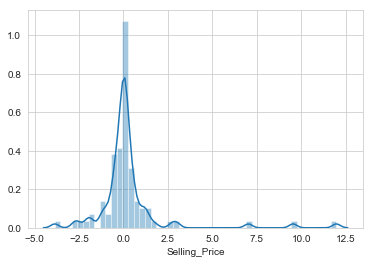

In [49]:
sns.distplot(y_test-y_pred)

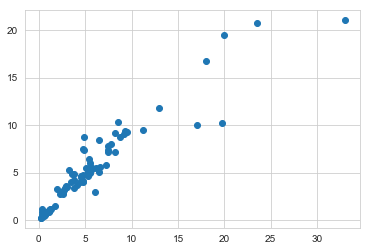

In [50]:
plt.scatter(y_test,y_pred)

In [51]:
##Evaluation of model using various metrics

from sklearn import  metrics

print('MAE:{}').format(metrics.mean_absolute_error(y_test,y_pred))
print('MSE:{}').format(metrics.mean_squared_error(y_test,y_pred))
print('RMSE:{}').format(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE:0.890817472527
MSE:4.01616325285
RMSE:2.0040367394


In [52]:
import pickle

In [53]:

# open a file, where you ant to store the data
file = open('rf_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(random_search, file)